# Word Encoding & Embedding

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from tqdm import tqdm
import warnings
import seaborn as sns
import random

warnings.filterwarnings('ignore')
%matplotlib inline

In [56]:
titanic_tr = pd.read_csv('train.csv')
titanic_te = pd.read_csv('test.csv')

In [57]:
titanic_tr.shape

(891, 12)

In [58]:
titanic_te.shape

(418, 11)

In [59]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Encoding - titanic data

### one-hot-Encoding

In [65]:
len(titanic_tr.Sex.unique())

2

In [60]:
titanic_tr = titanic_tr.join(pd.get_dummies(titanic_tr['Sex'], prefix='Sex'))
titanic_te = titanic_te.join(pd.get_dummies(titanic_te['Sex'], prefix='Sex'))

In [61]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [64]:
len(titanic_tr.Ticket.unique())

681

In [69]:
titanic_tr.join(pd.get_dummies(titanic_tr['Ticket'], prefix='Ticket')).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,0


In [67]:
titanic_tr.join(pd.get_dummies(titanic_tr['Ticket'], prefix='Ticket')).shape

(891, 695)

<font color = blue>Catergory가 2개 밖에 없으면 차원도 그렇게 많이 커지지 않지만, Category 개수가 많아지면 data가 Sparse해진다.

### Label Encoding

In [75]:
# 직접변환
titanic_tr.Pclass = titanic_tr.Pclass.map(lambda x: '좋음' if x == 1 else ('보통'if x == 2  else '나쁨'))
titanic_te.Pclass = titanic_te.Pclass.map(lambda x: '좋음' if x == 1 else ('보통'if x == 2  else '나쁨'))

In [76]:
titanic_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,나쁨,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,좋음,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,나쁨,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,좋음,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,나쁨,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [79]:
# 패키지사용 변환
titanic_tr['Pclass_label'] = pd.Categorical(titanic_tr.Pclass).codes
titanic_te['Pclass_label'] = pd.Categorical(titanic_te.Pclass).codes

In [82]:
titanic_tr[['Pclass', 'Pclass_label']]
titanic_te[['Pclass', 'Pclass_label']]

,Pclass,Pclass_label
0,나쁨,0
1,좋음,2
2,나쁨,0
3,좋음,2
4,나쁨,0
...,...,...
886,보통,1
887,좋음,2
888,나쁨,0
889,좋음,2


### Target Encoding

In [200]:
temp_data_tr = titanic_tr[['Sex', 'Survived']]

In [201]:
sex_mean = titanic_tr.groupby('Sex').Survived.mean()

In [203]:
temp_data_tr['Sex_mean'] = temp_data_tr['Sex'].map(sex_mean)
temp_data_tr.head()

,Sex,Survived,Sex_mean
0,male,0,0.188908
1,female,1,0.742038
2,female,1,0.742038
3,female,1,0.742038
4,male,0,0.188908


In [244]:
titanic_tr.Survived = titanic_tr.Survived.astype('category')

In [245]:
titanic_tr['Sex_mean'] = titanic_tr['Sex'].map(sex_mean)
titanic_te['Sex_mean'] = titanic_te['Sex'].map(sex_mean)

In [264]:
titanic_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_label,Sex_mean
0,1,0,나쁨,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0.188908
1,2,1,좋음,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,2,0.742038
2,3,1,나쁨,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0.742038
3,4,1,좋음,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,2,0.742038
4,5,0,나쁨,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,보통,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,1,0.188908
887,888,1,좋음,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,2,0.742038
888,889,0,나쁨,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0.742038
889,890,1,좋음,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,2,0.188908


In [265]:
titanic_te

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Sex_mean
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0.188908
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0.742038
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0.188908
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0.188908
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0.742038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0.188908
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0.742038
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0.188908
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1,0.188908


더 많은 Target Encoding 방법
- Smoothing
- CVloop
- Expending mean

https://dailyheumsi.tistory.com/120

# Word2Vetor 

#### corpus (단어사전(=말뭉치) 구성)
word2vector는 원래 딥러닝의 자연어처리 부분에서 많이 사용하는 알고리즘이기 때문에 기본적으로 문장들에 대해서 처리가 이루어 집니다.  
이렇게 문장들이 모여져 있는 리스트를 corpus라고 칭합니다.

In [1]:
corpus = ['I have a dream that one day this nation will rise up and live out the true meaning of its creed We hold these truths to be self evident that all men are created equal',
          'I have a dream that one day on the red hills of Georgia the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood',
          'I have a dream that one day even the state of Mississippi a state sweltering with the heat of injustice sweltering with the heat of oppression will be transformed into an oasis of freedom and justice',
          'I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character',
          'I have a dream today']

In [2]:
w2v_input = [sentence.split() for sentence in corpus]

In [5]:
w2v_input[0]

['I',
 'have',
 'a',
 'dream',
 'that',
 'one',
 'day',
 'this',
 'nation',
 'will',
 'rise',
 'up',
 'and',
 'live',
 'out',
 'the',
 'true',
 'meaning',
 'of',
 'its',
 'creed',
 'We',
 'hold',
 'these',
 'truths',
 'to',
 'be',
 'self',
 'evident',
 'that',
 'all',
 'men',
 'are',
 'created',
 'equal']

#### corpus 단어에 w2v 방법을 이용해 학습 후 embedded vector 구하기

 - embedded vector : 해당 단어를 벡터 차원에 흩뿌렸을 때 어떠한 값을 갖느냐?

In [6]:
from gensim.models import word2vec

w2v = word2vec.Word2Vec(sentences = w2v_input, 
                        vector_size = 2,           # 임베딩된 벡터의 차원, 실제로 데이터프레임으로 나오는 차원(열)의 갯수
                        window = 3,                # 컨텍스트의 윈도우 크기
                        min_count = 1,             # 단어 최소 빈도 수 제한(빈도수가 낮은 단어는 학습하지 않음)
                        sg = 1)                    # sg = 1 : skip-gram, sg = 0 : cbow

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [13]:
wv = w2v.wv
vocabs = wv.index_to_key
word_vectors = [wv[v] for v in vocabs]

In [14]:
vocabs

['of',
 'the',
 'a',
 'I',
 'will',
 'have',
 'dream',
 'that',
 'be',
 'one',
 'day',
 'and',
 'nation',
 'former',
 'state',
 'their',
 'sweltering',
 'with',
 'heat',
 'by',
 'sons',
 'live',
 'to',
 'men',
 'are',
 'all',
 'evident',
 'self',
 'created',
 'truths',
 'equal',
 'its',
 'these',
 'hold',
 'We',
 'creed',
 'red',
 'meaning',
 'true',
 'out',
 'up',
 'rise',
 'this',
 'on',
 'today',
 'hills',
 'Georgia',
 'freedom',
 'justice',
 'my',
 'four',
 'little',
 'children',
 'in',
 'where',
 'they',
 'not',
 'judged',
 'color',
 'skin',
 'but',
 'content',
 'oasis',
 'an',
 'into',
 'together',
 'character',
 'slave',
 'owners',
 'able',
 'sit',
 'down',
 'at',
 'transformed',
 'table',
 'brotherhood',
 'even',
 'Mississippi',
 'injustice',
 'oppression',
 'slaves']

In [15]:
word_vectors

[array([-0.02946555,  0.02714808], dtype=float32),
 array([0.25358304, 0.46300024], dtype=float32),
 array([-0.46539414, -0.34807885], dtype=float32),
 array([0.321988  , 0.45164502], dtype=float32),
 array([-0.2541229 , -0.17359038], dtype=float32),
 array([ 0.369249  , -0.07551694], dtype=float32),
 array([-0.2277874 ,  0.33218405], dtype=float32),
 array([-0.24460162, -0.0798342 ], dtype=float32),
 array([0.14021975, 0.05567847], dtype=float32),
 array([-0.41687128, -0.46223548], dtype=float32),
 array([0.36147282, 0.26467595], dtype=float32),
 array([0.33827928, 0.0428129 ], dtype=float32),
 array([ 0.3169    , -0.16952062], dtype=float32),
 array([-0.05001064,  0.2985178 ], dtype=float32),
 array([-0.37744054, -0.19235843], dtype=float32),
 array([-0.37538967, -0.04259581], dtype=float32),
 array([ 0.4776671, -0.3626392], dtype=float32),
 array([-0.11937759, -0.08239233], dtype=float32),
 array([ 0.4010051 , -0.28782448], dtype=float32),
 array([ 0.00145122, -0.23321748], dtype=fl

In [304]:
wv.vectors             # corpus(말뭉치)에 있는 단어들이 embedding 되어 나오는 vector값 
                       # = 우리가 실제로 feature로 만들어야 하는 값

array([[-0.02946555,  0.02714808],
       [ 0.25358304,  0.46300024],
       [-0.46539414, -0.34807885],
       [ 0.321988  ,  0.45164502],
       [-0.2541229 , -0.17359038],
       [ 0.369249  , -0.07551694],
       [-0.2277874 ,  0.33218405],
       [-0.24460162, -0.0798342 ],
       [ 0.14021975,  0.05567847],
       [-0.41687128, -0.46223548],
       [ 0.36147282,  0.26467595],
       [ 0.33827928,  0.0428129 ],
       [ 0.3169    , -0.16952062],
       [-0.05001064,  0.2985178 ],
       [-0.37744054, -0.19235843],
       [-0.37538967, -0.04259581],
       [ 0.4776671 , -0.3626392 ],
       [-0.11937759, -0.08239233],
       [ 0.4010051 , -0.28782448],
       [ 0.00145122, -0.23321748],
       [-0.48101443,  0.25979   ],
       [-0.4400999 , -0.21473387],
       [-0.00059596, -0.00959932],
       [-0.38337997,  0.48469368],
       [ 0.24853493,  0.46844786],
       [-0.40916547,  0.23246543],
       [-0.20778103,  0.04611799],
       [ 0.42454165, -0.21972282],
       [ 0.22567812,

In [285]:
wv['have']

array([ 0.369249  , -0.07551694], dtype=float32)

In [293]:
wv.most_similar(positive = "four", topn = 5)  # four 라는 단어에 대해 가장 유사한 5개의 단어들

[('slaves', 0.9990484714508057),
 ('sons', 0.9965697526931763),
 ('this', 0.9959955215454102),
 ('all', 0.9945638179779053),
 ('equal', 0.9829847812652588)]

In [300]:
wv.most_similar(positive = ["freedom", "justice"], topn = 5)

[('created', 0.999947726726532),
 ('but', 0.995492696762085),
 ('brotherhood', 0.9938454031944275),
 ('content', 0.991572380065918),
 ('sit', 0.9622073173522949)]

<font color = blue> 실제로 다량의 corpus가 존재했다면 학습이 더 잘되어 비슷한 단어끼리 similar가 높았겠지만 현재는 corpus set이 작기 때문에 그러한 결과는 나오지 못함 

In [16]:
def plot_graph(vocabs, x, y):
    plt.figure(figsize = (15, 10))
    plt.scatter(x, y, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy = (x[i], y[i]))

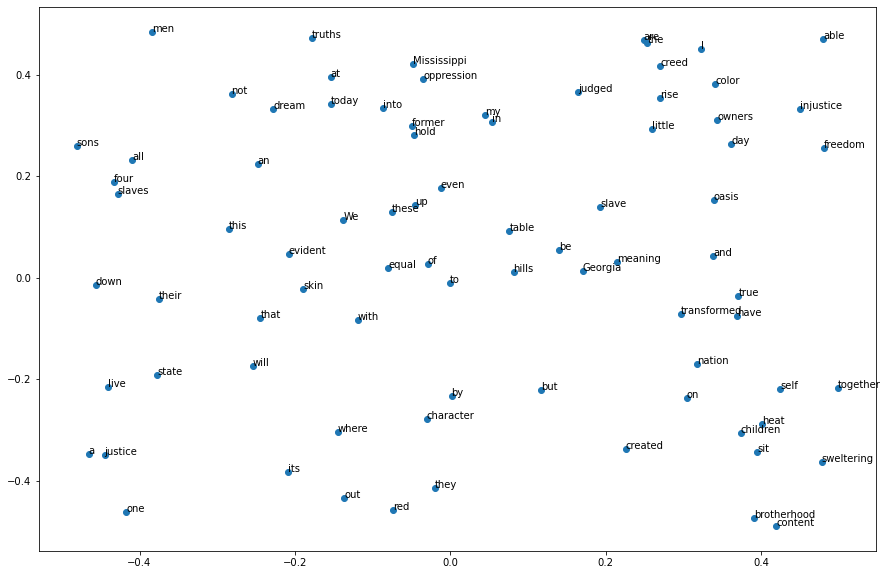

In [21]:
x = np.array(word_vectors)[:, 0]
y = np.array(word_vectors)[:, 1]

plot_graph(vocabs, x, y)

## 실전활용

In [22]:
train = pd.read_csv('./캐글 컴피티션 데이터/train.csv')
test = pd.read_csv('./캐글 컴피티션 데이터/test.csv')

In [23]:
train_data = list(train.groupby('CLNT_ID')['CLAC3_NM'].unique())
test_data = list(test.groupby('CLNT_ID')['CLAC3_NM'].unique())

In [27]:
# 각 client clac3_nm이 아까 단어들을 split한 것처럼 되어 있음
train_data

[array(['블랜더', '거실수예소품'], dtype=object),
 array(['남성수영복', '페이셜클렌저', '선크림류', '여성비치웨어', '홍삼액', 'BB/파운데이션/컴팩트류',
        '에센스/세럼'], dtype=object),
 array(['여성속옷세트', '브래지어', '여성팬티', '여성스포츠샌들/슬리퍼'], dtype=object),
 array(['유아동팬티'], dtype=object),
 array(['유아동일반양말', '여성샌들', '유아동타이즈', '주방칼/가위', '영유아점프수트/오버롤', '아동모',
        '프라이팬'], dtype=object),
 array(['롤티슈'], dtype=object),
 array(['플라스틱서랍장'], dtype=object),
 array(['유아용화장품', '일반형냉장고'], dtype=object),
 array(['핸드로션/크림', '남성스포츠티셔츠', '페이셜클렌저', '크림/밤/오일', '골프공', '골프연습장비',
        '립글로즈/틴트'], dtype=object),
 array(['남성일반지갑'], dtype=object),
 array(['남성런닝/트레이닝화', '애견주거/실내용품', '선크림류'], dtype=object),
 array(['생수'], dtype=object),
 array(['여성트레이닝복', '남성스포츠티셔츠'], dtype=object),
 array(['여성런닝셔츠/캐미솔', '여성팬티'], dtype=object),
 array(['채소즙'], dtype=object),
 array(['남성용스킨케어류', '3단우산', '스포츠가방', '남성팬티'], dtype=object),
 array(['여성남방셔츠', '여성원피스', '유아동이불/이불커버'], dtype=object),
 array(['여성비치웨어'], dtype=object),
 array(['BB/파운데이션/컴팩트류'], dtype=object),
 ar

####  Corpus 크기가 작기 때문에 oversampling 진행
 - 아까 i have a dream 예제와는 다르게 각 list당 단어가 많지 않다. --> 학습 데이터가 적다는 의미
 - 학습 데이터를 늘리기 위해서 각 customer가 구매한 아이템을 배수로 곱해 학습 데이터를 늘리는 행위.

In [28]:
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
          random.shuffle(i)
          tmp += list(i)
        lst.append(tmp)
    return lst

In [29]:
w2v_input = oversample(train_data, 5)

In [65]:
# 각 customer ID 별로 구매한 아이템을 랜덤으로 증가시킴
w2v_input[1]

['에센스/세럼',
 '선크림류',
 'BB/파운데이션/컴팩트류',
 '여성비치웨어',
 '홍삼액',
 '남성수영복',
 '페이셜클렌저',
 '페이셜클렌저',
 '남성수영복',
 'BB/파운데이션/컴팩트류',
 '선크림류',
 '여성비치웨어',
 '에센스/세럼',
 '홍삼액',
 'BB/파운데이션/컴팩트류',
 '페이셜클렌저',
 '여성비치웨어',
 '홍삼액',
 '남성수영복',
 '에센스/세럼',
 '선크림류',
 '여성비치웨어',
 '남성수영복',
 '홍삼액',
 '페이셜클렌저',
 'BB/파운데이션/컴팩트류',
 '선크림류',
 '에센스/세럼',
 '선크림류',
 '페이셜클렌저',
 'BB/파운데이션/컴팩트류',
 '남성수영복',
 '여성비치웨어',
 '홍삼액',
 '에센스/세럼']

In [31]:
w2v = word2vec.Word2Vec(sentences = w2v_input,
                        vector_size = 30,
                        window = 3,
                        min_count = 1,
                        sg = 1).wv

<font color = blue> 현재 상태로는 바로 피쳐로 적용할 수 없다. customer ID 별 아이템들이 전부 vector화 되어있기 때문

#### Train

In [43]:
train_mean_vector = []

for words in tqdm(train_data):
        tmp = np.zeros(30)             # 다음 customer ID에 대한 vector를 계삲하기 전 0으로 초기화
        cnt = 0
        for word in words:
            try:
                tmp += w2v[word]
                cnt += 1
            except:
                pass
        tmp /= cnt                      # customer ID 에 있는 아이템 갯수로 전체 벡터를 mean해줌  
        train_mean_vector.append(tmp)
        
train_mean_vector = np.array(train_mean_vector)

100%|███████████████████████████████████████████████████████████████████████| 150000/150000 [00:02<00:00, 74999.60it/s]


In [49]:
train_mean_vector.shape

(150000, 30)

In [51]:
pd.DataFrame(train_mean_vector)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.546640,-0.136183,0.323716,0.356513,0.179319,-0.102487,0.181770,-0.274482,-0.560325,0.219356,...,0.034842,0.233054,0.242609,0.563401,0.480701,0.049524,0.284050,0.041456,-0.048810,-0.256523
1,0.177541,-0.061131,0.334270,-0.263567,0.228220,0.141331,-0.020981,0.208973,-0.303443,0.500546,...,0.177708,-0.293395,0.071465,0.033268,0.516355,0.037279,0.451479,0.113073,-0.315720,-0.513288
2,0.212242,-0.219746,0.472206,0.113025,-0.009075,-0.088393,0.083172,0.194587,-0.168693,-0.093803,...,-0.058277,-0.025828,0.037177,0.140227,0.640848,-0.406257,0.213699,0.758494,-0.119454,-0.607080
3,0.019923,-0.619992,0.010535,-0.242162,-0.127728,0.384800,0.676105,0.308515,0.004409,0.329053,...,0.017486,0.090076,0.073870,0.404034,0.486942,-0.317483,0.698326,0.508674,0.379069,-0.350845
4,0.236149,-0.506986,-0.122794,-0.261806,-0.045120,0.365669,0.365160,-0.002978,-0.317478,0.314800,...,0.225444,-0.096125,-0.220557,0.248275,0.452508,-0.280240,0.437003,0.372845,-0.131414,-0.156278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.550241,-0.723977,0.494757,0.174527,0.058092,-0.204154,0.491703,-0.688329,-0.178220,-0.056343,...,-0.050649,-0.410645,0.122298,0.099386,0.013244,0.216890,0.281100,-0.082605,-0.317680,-0.549193
149996,0.236683,-0.403043,0.105186,-0.237749,-0.007604,0.320135,0.030011,0.241753,-0.304548,0.415874,...,-0.129402,-0.338685,0.097496,-0.222060,0.483255,-0.138945,0.473396,0.314710,-0.126601,-0.790615
149997,0.397245,0.026175,0.549985,0.297082,-0.315701,0.306430,0.025767,0.056761,-0.306557,0.147066,...,0.037439,0.317207,-0.249241,-0.131446,0.559007,-0.111886,-0.016844,0.185439,0.657259,-0.736610
149998,0.172029,-0.253911,-0.064439,0.370688,0.012152,-0.342365,0.587679,0.616190,-0.349060,0.391688,...,0.319423,0.027378,0.444329,0.141149,0.954765,0.604490,-0.354489,-0.599707,0.031900,-0.059441


#### Test

In [75]:
test_mean_vector = []

for words in tqdm(test_data):
        tmp = np.zeros(30)
        cnt = 0
        for word in words:
            try:
                tmp += w2v[word]
                cnt += 1
            except:
                pass
        tmp /= cnt
        test_mean_vector.append(tmp)
test_mean_vector = np.array(test_mean_vector)


100%|███████████████████████████████████████████████████████████████████████| 113104/113104 [00:01<00:00, 73288.49it/s]


In [76]:
test_mean_vector.shape

(113104, 30)

In [77]:
pd.DataFrame(test_mean_vector)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.032424,-0.789111,0.280500,-0.340716,-0.231415,0.453652,0.144086,-0.308613,-0.149530,0.677566,...,0.081992,-0.250905,0.022625,0.244523,0.389043,-0.280467,0.140873,0.367941,0.199627,-0.757573
1,0.347676,-0.032493,0.330857,-0.132140,0.817239,-0.072780,0.047015,-0.020688,-0.796492,0.041971,...,0.260911,0.010468,0.190882,-0.018841,0.430222,0.027204,-0.008304,-0.193688,-0.026055,-0.911701
2,0.326360,0.000824,0.363745,-0.040828,0.030607,0.333741,0.226716,0.089118,-0.278651,0.444834,...,0.304757,0.035153,0.055836,-0.376570,0.254762,0.299436,0.601229,0.310760,-0.236475,-0.542300
3,-0.407157,-0.091933,-0.196596,0.034817,0.023160,0.066252,0.047369,0.848076,-0.464939,0.421738,...,-0.200881,-0.523206,-0.181417,-0.362539,0.660984,0.152187,0.985505,0.134343,-0.041754,-0.228686
4,0.229514,-0.393193,0.453883,0.212660,0.264602,0.148475,0.079287,-0.101919,-0.221647,0.133541,...,0.453851,0.007862,-0.064811,-0.312712,0.539004,0.111490,0.122302,0.206693,-0.131901,-0.281770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113099,0.267437,0.164044,0.071144,-0.250222,0.209286,0.074682,-0.173662,0.088377,-0.267343,0.349082,...,0.114779,-0.094427,-0.108191,0.108169,0.437216,-0.092162,0.465619,0.291849,0.127743,-0.490503
113100,0.328631,-0.211494,0.377496,0.295700,0.339138,0.158173,0.601697,-0.374233,0.188675,0.464745,...,0.241437,0.387944,-0.166565,-0.776817,0.492491,0.482147,0.305093,0.796803,0.231152,-0.350634
113101,0.271196,-0.132194,0.478318,0.350703,0.328738,0.226267,0.509893,-0.165057,-0.269647,0.334707,...,0.347491,0.361915,-0.301224,-0.517864,0.264008,-0.014477,0.215370,0.688305,-0.124583,-0.373354
113102,0.264465,-0.289650,0.462792,0.253545,0.269022,0.156500,0.289161,-0.085367,-0.250493,0.147712,...,0.513777,0.229834,-0.194845,-0.399984,0.405735,0.009804,0.272563,0.257613,-0.156028,-0.275915


### 주의사항 및 해볼것

- CLAC3_NM 열이 아닌 다른 열에 대해 W2V을 시도해 볼 수 있다.
- oversample을 5배가 아니라 다른 숫자로 시도한다.
- word2vec 시행시 vector_size, window_size등을 조정해 볼 수 있다.
- 마지막 vector의 계산 방법을 mean이 아니라 max, min 등을 시행해 볼 수 있다.

<font color = red> ※ 이렇게 산출된 범주형 피쳐에 대한 w2v값은 수치형 변수와 달리 scaling을 하지 않는다.